In [3]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.graphics.factorplots import interaction_plot
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
dat = pd.read_csv('datasets_logos.csv')

In [5]:
dat.head()

,id,friendly,inviting,interesting,positive,pleasant,sex,logo
0,3,9,8,9,10,9,f,Logo A
1,98,7,6,8,7,7,f,Logo C
2,73,5,3,6,6,6,m,Logo C
3,89,4,5,2,3,4,f,Logo C
4,13,8,7,9,8,6,f,Logo A


In [6]:
dat.dropna(subset= ['logo'], inplace=True)

dat['sentiment'] = dat [['friendly', 'inviting','interesting', 'positive', 'pleasant']].apply(np.mean, axis=1)
dat.head()

,id,friendly,inviting,interesting,positive,pleasant,sex,logo,sentiment
0,3,9,8,9,10,9,f,Logo A,9.0
1,98,7,6,8,7,7,f,Logo C,7.0
2,73,5,3,6,6,6,m,Logo C,5.2
3,89,4,5,2,3,4,f,Logo C,3.6
4,13,8,7,9,8,6,f,Logo A,7.6


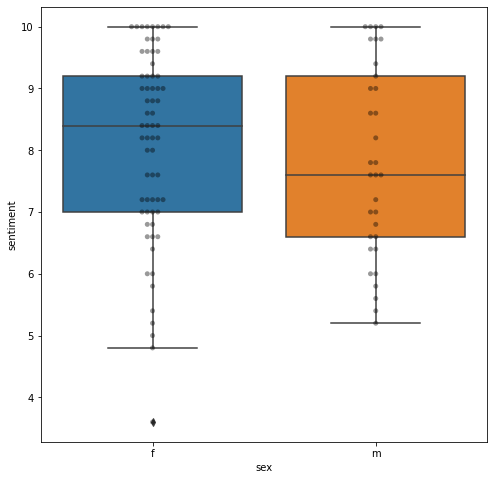

In [9]:
ax = plt.figure(figsize=(8,8)).gca()
sns.boxplot(x='sex', y='sentiment', data = dat, ax= ax)
sns.swarmplot(x = 'sex', y = 'sentiment', color='black', data=dat, ax=ax, alpha=0.4)

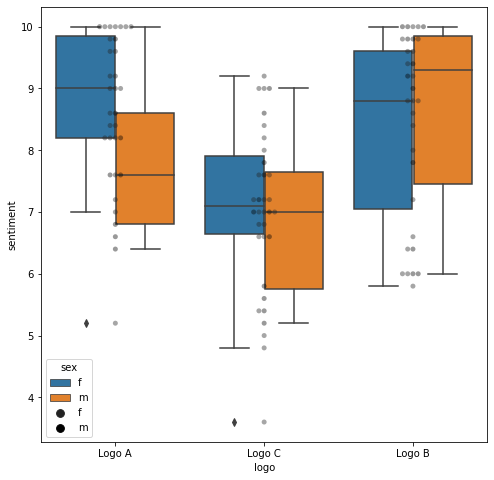

In [11]:
ax = plt.figure(figsize=(8,8)).gca()
sns.boxplot(x='logo', y='sentiment', hue='sex',data = dat, ax= ax)
sns.swarmplot(x = 'logo', y = 'sentiment', hue='sex', color='black', data=dat, ax=ax, alpha=0.4)

In [12]:
dat_grouped = dat[['sentiment', 'logo', 'sex']].groupby(['logo','sex'])
print('The means of the groups:')
print(dat_grouped.mean())
print('\n')
print('The standard deviations of the groups:')
print(dat_grouped.std())

The means of the groups:
            sentiment
logo   sex           
Logo A f     8.808333
       m     7.955556
Logo B f     8.340000
       m     8.616667
Logo C f     7.054545
       m     6.900000


The standard deviations of the groups:
            sentiment
logo   sex           
Logo A f     1.197794
       m     1.318248
Logo B f     1.471269
       m     1.621354
Logo C f     1.403644
       m     1.237299


In [13]:
formula = 'sentiment ~ C(logo) +C(sex) + C(logo):C(sex)'
lm_model = ols(formula, dat).fit()
aov_table = anova_lm(lm_model, typ=2)
print(aov_table)

                    sum_sq    df          F    PR(>F)
C(logo)          50.649749   2.0  13.446086  0.000007
C(sex)            1.015771   1.0   0.539318  0.464563
C(logo):C(sex)    4.503817   2.0   1.195637  0.307118
Residual        175.159768  93.0        NaN       NaN


 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1  group2 meandiff p-adj   lower   upper  reject
------------------------------------------------------
LogoA_f LogoA_m  -0.8528 0.5931 -2.4137  0.7082  False
LogoA_f LogoB_f  -0.4683 0.8563 -1.6774  0.7408  False
LogoA_f LogoB_m  -0.1917    0.9 -1.6036  1.2203  False
LogoA_f LogoC_f  -1.7538  0.001 -2.9325  -0.575   True
LogoA_f LogoC_m  -1.9083 0.0022 -3.3203 -0.4964   True
LogoA_m LogoB_f   0.3844    0.9 -1.2185  1.9874  False
LogoA_m LogoB_m   0.6611 0.8761 -1.0999  2.4221  False
LogoA_m LogoC_f   -0.901 0.5536 -2.4812  0.6792  False
LogoA_m LogoC_m  -1.0556 0.5052 -2.8165  0.7054  False
LogoB_f LogoB_m   0.2767    0.9 -1.1816  1.7349  False
LogoB_f LogoC_f  -1.2855 0.0361 -2.5193 -0.0516   True
LogoB_f LogoC_m    -1.44  0.055 -2.8982  0.0182  False
LogoB_m LogoC_f  -1.5621 0.0244 -2.9953  -0.129   True
LogoB_m LogoC_m  -1.7167  0.033  -3.347 -0.0863   True
LogoC_f LogoC_m  -0.1545    0.9 -1.5877  1.2786  False
----------

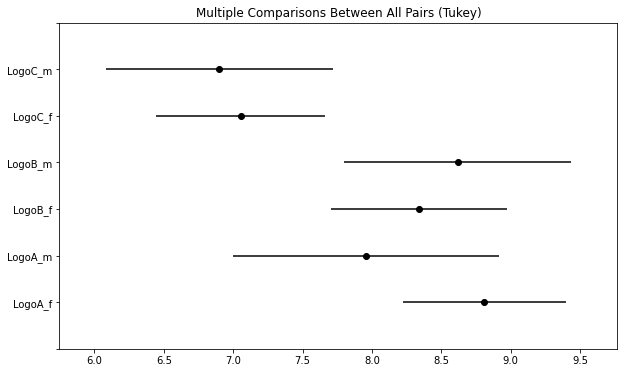

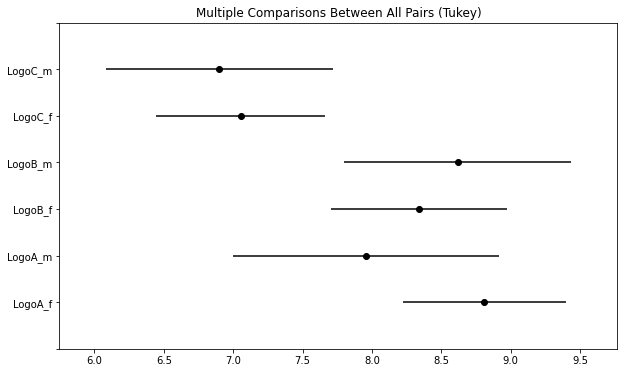

In [14]:
## Create a new variable to represent the interaction term
dat['logo_sex'] = [x.replace(" ", "") + '_' + y for x,y in zip(dat.logo,dat.sex)]

# Run the Tukey HDS test using the interaction variable and display the results
Tukey_HSD = pairwise_tukeyhsd(dat.sentiment,dat.logo_sex)
print(Tukey_HSD)
Tukey_HSD.plot_simultaneous()